In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('dados_matriculas.xlsx')

display(df)

In [ ]:
# Gráfico de matriculas mensais
plt.figure(figsize=(10, 5))
df['Matrículas'].plot(marker='o', linestyle='--', color='red',)
plt.title('Matrículas mensais') # Título
plt.xlabel('Mês')
plt.ylabel('Número de mátriculas')
plt.grid(True)
plt.show

In [29]:
#Identificar o mÊs com maior e menor npúmero de mátriculas

maior_matricula = df['Matrículas'].max()
indice_maior_matricula = df['Matrículas'].idxmax()

print(maior_matricula)
print(indice_maior_matricula)

470
1


In [28]:
menor_matricula = df['Matrículas'].min()
indice_menor_matricula = df['Matrículas'].idxmin()

print(menor_matricula)
print(indice_menor_matricula)


220
5


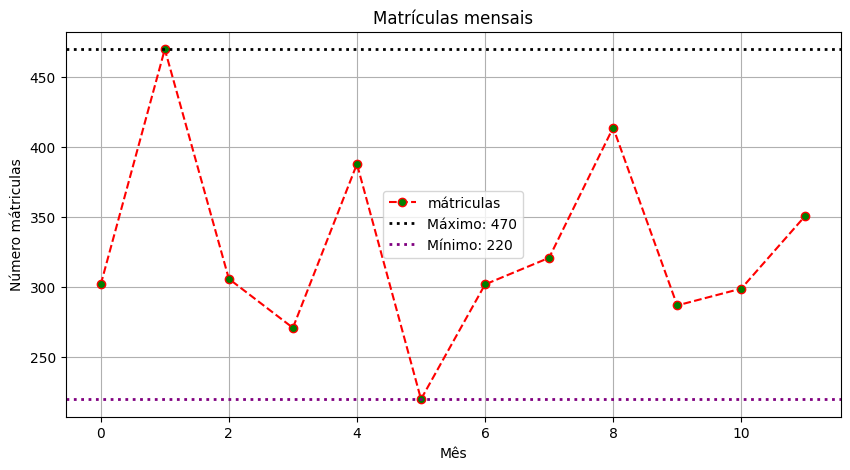

In [50]:
plt.figure(figsize=(10, 5 ))
df['Matrículas'].plot(marker='o', linestyle='--', color='red', label='mátriculas', mfc='green')

#Informações de destaque

plt.axhline(y=maior_matricula, 
            color='black',
            linestyle=':',
            linewidth=2,
            label=f"Máximo: {maior_matricula}")  

plt.axhline(y=menor_matricula,
           color='purple',
           linestyle=':',
           linewidth=2,
           label=f"Mínimo: {menor_matricula}")

plt.title('Matrículas mensais')
plt.xlabel('Mês')
plt.ylabel('Número mátriculas')
plt.grid(True)
plt.legend()
plt.show()